In [1]:
import torch


In [5]:
a = torch.Tensor(3)
print(a.data.tolist)
print(a.shape)

<built-in method tolist of Tensor object at 0x000000000948C870>
torch.Size([3])


In [6]:
print(a)

tensor([-8.1068e+18,  2.8671e-42,  0.0000e+00])


In [7]:
b = a.unsqueeze(1)
print(b)

tensor([[-8.1068e+18],
        [ 2.8671e-42],
        [ 0.0000e+00]])


In [8]:
b.squeeze_(1)

tensor([-8.1068e+18,  2.8671e-42,  0.0000e+00])

In [11]:
a = torch.LongTensor([[0,1,2,3]]).t()

In [12]:
print(a)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3]])


In [15]:
b = torch.arange(9).reshape(3,3)

In [16]:
print(b)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])


In [17]:
bt = b.t()

In [18]:
print(bt)

tensor([[ 0.,  3.,  6.],
        [ 1.,  4.,  7.],
        [ 2.,  5.,  8.]])


In [19]:
print(bt.is_contiguous())

False


In [20]:
bt.contiguous()

tensor([[ 0.,  3.,  6.],
        [ 1.,  4.,  7.],
        [ 2.,  5.,  8.]])

In [23]:
print(b)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])


In [24]:
c = torch.arange(1,10).view(3,3)

In [33]:
b.(1,-1)
c.view(1,-1)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [28]:
torch.dot(b[0],c[0])

tensor(8.)

In [32]:
print(b,c
     )

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]]) tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.]])


In [34]:
torch.mm(b,c)

tensor([[  18.,   21.,   24.],
        [  54.,   66.,   78.],
        [  90.,  111.,  132.]])

In [2]:
a = torch.arange(20000000)

In [3]:
print(a[-1],a[-2])

tensor(1.6777e+07) tensor(1.6777e+07)


In [4]:
b = torch.LongTensor()

In [5]:
a = torch.arange(20000000,out=b)

In [6]:
print(b[-1],b[-2])

tensor(2.0000e+07) tensor(2.0000e+07)


In [7]:
a = torch.randn(2,3)

In [8]:
a

tensor([[ 1.0150, -0.6527, -0.6765],
        [ 0.6255,  0.0965, -0.1381]])

In [9]:
torch.set_printoptions(precision=10)
print(a)

tensor([[1.0149990320, -0.6526682377, -0.6764885187],
        [0.6254675984, 0.0964616761, -0.1380839497]])


In [10]:
import matplotlib.pyplot as plt
from IPython import display


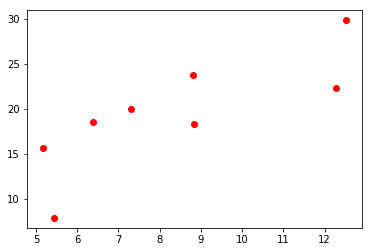

In [16]:
torch.manual_seed(1000)

def get_fake_data(batch_size=8):
    x = torch.rand(batch_size,1) * 20
    y = x * 2+ (1 + torch.randn(batch_size,1)) * 3
    return x,y

x,y = get_fake_data()
plt.scatter(x.numpy(),y.numpy(),c='r')
plt.show()

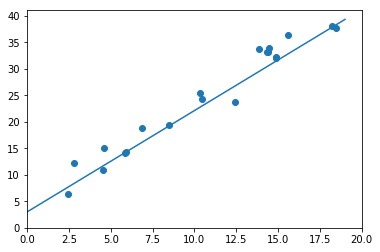

tensor(1.9114519358) tensor(2.9787027836)


In [67]:
w = Variable(torch.rand(1,1),requires_grad=True)
b = Variable(torch.zeros(1,1),requires_grad=True)
learning_rate = 0.001
for i in range(8000):
    x,y = get_fake_data()
    x = Variable(x)
    y = Variable(y)
    y_pred = x.mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    loss.backward()
    
    w.data.sub_(learning_rate*w.grad.data)
    b.data.sub_(learning_rate*b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
#     print(type(w.grad))
    
    
    if i % 1000 == 0:
        display.clear_output(wait=True)
        x = torch.arange(20).view(-1,1)
        y = x.mm(w.data) + b.data
        plt.plot(x.numpy(),y.numpy())
        
        x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        print(w.squeeze()[0],b.squeeze()[0])

In [17]:
from torch.autograd import Variable


In [28]:
x = Variable(torch.randn(3,4),requires_grad=True)


In [29]:
def f(x):
    y = x ** 2* torch.exp(x)
    return y

In [30]:
def gradf(x):
    dx = 2*x*torch.exp(x) + x**2*torch.exp(x)
    return dx

In [31]:
y = f(x)
print(x)

print(y)

tensor([[-0.7195537686, 0.9824597836, -1.0365216732, -1.1645823717],
        [0.0305196904, -0.5842280984, 2.0982820988, 0.9039351940],
        [-0.8997013569, -0.6453833580, -1.6575587988, 0.1985828280]])
tensor([[0.2521321774, 2.5781397820, 0.3810668290, 0.4232224822],
        [0.0009603174, 0.1902996004, 35.8922004700, 2.0176632404],
        [0.3292012215, 0.2184485048, 0.5236839056, 0.0480979793]])


In [32]:
y.backward(torch.ones(y.size()))
x.grad

tensor([[-0.4486693144, 7.8264760971, -0.3542131484, -0.3036003113],
        [0.0638913289, -0.4611568749, 70.1032333374, 6.4818401337],
        [-0.4025998712, -0.4585088491, -0.1081898212, 0.5325102210]])

In [35]:
print(gradf(torch.Tensor([-0.7195538])))

tensor([-0.4486692846])


In [37]:
x = Variable(torch.ones(1))
w = Variable(torch.rand(1),requires_grad=True)
b = Variable(torch.rand(1),requires_grad=True)
y = x * w
z = y + b


In [38]:
x.requires_grad,w.requires_grad,b.requires_grad

(False, True, True)

In [39]:
y.requires_grad

True

In [41]:
x.is_leaf,y.is_leaf,b.is_leaf

(True, False, True)

In [42]:
z.grad_fn

In [43]:
y.grad_fn.saved_variables

AttributeError: 'MulBackward1' object has no attribute 'saved_variables'

In [44]:
z.backward(retain_graph=True)
w.grad

tensor([ 1.])

In [46]:
w.grad_fn

In [47]:
y.grad_fn.saved_variables

AttributeError: 'MulBackward1' object has no attribute 'saved_variables'

In [49]:
def abs(x):
    if x.data[0] > 0:return x
    else: return -x

x = Variable(torch.ones(1),requires_grad=True)
y = abs(x)
y.backward()
x.grad

tensor([ 1.])

In [56]:
x = Variable(torch.ones(3),requires_grad=True)
w = Variable(torch.rand(3),requires_grad=True)
y = w * x
z = y.sum()

x.requires_grad,w.requires_grad,y.requires_grad

(True, True, True)

In [57]:
z.backward(retain_graph=True)
print((x.grad,w.grad,
y.grad))

(tensor([0.4181194305, 0.7386718392, 0.5685091615]), tensor([ 1.,  1.,  1.]), None)


In [58]:
torch.autograd.grad(z,y)

(tensor([ 1.,  1.,  1.]),)

In [60]:
print(y)

tensor([0.4181194305, 0.7386718392, 0.5685091615])
